In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [11]:
digits = datasets.load_digits()
X = digits.data
y = digits.target
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=666)
my_knn_clf = KNeighborsClassifier(n_neighbors=4)
my_knn_clf.fit(x_train,y_train)
my_knn_clf.score(x_test,y_test)

0.9916666666666667

## 网格搜索中的grid search

In [12]:
parm_grid = [
    {
        'weights':['uniform'],
        'n_neighbors':[i for i in range(1,11)]
    },
    {
        'weights':['distance'],
        'n_neighbors':[i for i in range(1,11)],
        'p':[i for i in range(1,6)]
    }
]

In [13]:
knn_clf = KNeighborsClassifier()

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
grid_search = GridSearchCV(knn_clf,parm_grid)

In [16]:
%%time
grid_search.fit(x_train,y_train)

/home/exia/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 5min 52s, sys: 20 ms, total: 5min 52s
Wall time: 5min 52s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [17]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance')

In [18]:
grid_search.best_params_

{'n_neighbors': 3, 'p': 3, 'weights': 'distance'}

In [19]:
grid_search.best_score_

0.9853862212943633

In [20]:
knn_clf = grid_search.best_estimator_
knn_clf.score(x_test,y_test)

0.9833333333333333

In [22]:
#n_jobs代表使用计算机的几个核心计算:-1代表全部使用
grid_search = GridSearchCV(knn_clf,parm_grid,n_jobs=-1,verbose=2)

In [23]:
grid_search.fit(x_train,y_train)

/home/exia/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=3,
           weights='distance'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

## 数据归一化
解决方案:将所有数据映射到同一尺度


1. 最值归一化
    * 把所有的数据映射到0,1之间

    * $$x_{scale}=\frac{x-x_{min}}{x_{max}-x_{min}}$$

    * 适用于分布有明显边界的情况;受outlier影响较大
 
2. 均值方差归一化

    - 把所有的数据归一到均值为0方差为1的分布中
    
    - 数据分布没有明显边界;有可能存在极端的数据值
    
    - $$x_{scale}=\frac{x-x_{mean}}{s}$$


### 最值归一化

In [24]:
x = np.random.randint(0,100,size=100)
x

array([12, 59, 87, 94, 18, 89, 21, 63, 49, 77, 73,  7, 18, 14,  5, 96, 49,
       38,  2, 22, 69, 14, 96, 33, 92, 44, 57, 21, 98, 89, 76, 65, 65, 36,
       99, 38,  7, 85, 56,  1, 29, 51, 61, 79, 36, 16,  4, 61, 46, 73,  3,
       54, 36, 64, 64, 69, 27, 33, 57, 96, 87, 36, 42,  5, 86, 99, 30, 86,
       25, 36, 69, 25, 76, 19, 18, 95, 77, 89,  3, 40, 86, 93,  1, 43, 32,
       38, 14, 34, 21, 28, 52, 58,  9, 98, 33, 64, 71, 72, 87, 71])

In [25]:
(x - np.min(x))/(np.max(x) -  np.min(x))

array([0.1122449 , 0.59183673, 0.87755102, 0.94897959, 0.17346939,
       0.89795918, 0.20408163, 0.63265306, 0.48979592, 0.7755102 ,
       0.73469388, 0.06122449, 0.17346939, 0.13265306, 0.04081633,
       0.96938776, 0.48979592, 0.37755102, 0.01020408, 0.21428571,
       0.69387755, 0.13265306, 0.96938776, 0.32653061, 0.92857143,
       0.43877551, 0.57142857, 0.20408163, 0.98979592, 0.89795918,
       0.76530612, 0.65306122, 0.65306122, 0.35714286, 1.        ,
       0.37755102, 0.06122449, 0.85714286, 0.56122449, 0.        ,
       0.28571429, 0.51020408, 0.6122449 , 0.79591837, 0.35714286,
       0.15306122, 0.03061224, 0.6122449 , 0.45918367, 0.73469388,
       0.02040816, 0.54081633, 0.35714286, 0.64285714, 0.64285714,
       0.69387755, 0.26530612, 0.32653061, 0.57142857, 0.96938776,
       0.87755102, 0.35714286, 0.41836735, 0.04081633, 0.86734694,
       1.        , 0.29591837, 0.86734694, 0.24489796, 0.35714286,
       0.69387755, 0.24489796, 0.76530612, 0.18367347, 0.17346

In [28]:
X = np.random.randint(0,100,(50,2))
X[:10,:]

array([[ 8, 40],
       [33, 71],
       [74, 12],
       [90, 66],
       [81, 14],
       [67, 78],
       [ 0, 60],
       [82, 81],
       [49, 91],
       [88, 60]])

In [30]:
X=np.array(X,dtype = float)
X[:10,:]

array([[ 8., 40.],
       [33., 71.],
       [74., 12.],
       [90., 66.],
       [81., 14.],
       [67., 78.],
       [ 0., 60.],
       [82., 81.],
       [49., 91.],
       [88., 60.]])

In [32]:
X[:,0] = (X[:,0]-np.min(X[:,0]))/(np.max(X[:,0])-np.min(X[:,0]))
X[:,1] = (X[:,1]-np.min(X[:,1]))/(np.max(X[:,1])-np.min(X[:,1]))

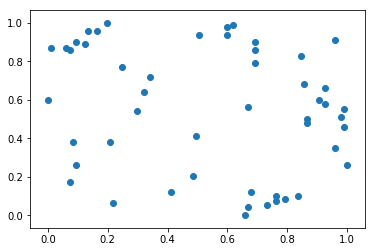

In [35]:
plt.scatter(X[:,0],X[:,1])

In [36]:
np.mean(X[:,0])

0.5430927835051547

In [37]:
np.std(X[:,0])

0.327201878339771

In [38]:
np.mean(X[:,1])

0.5495652173913044

In [39]:
np.std(X[:,1])

0.321681545963135

### 均值方差归一化

In [40]:
X2 = np.random.randint(0,100,(50,2))

In [41]:
X2 = np.array(X2,dtype=float)

In [43]:
X2[:,0] = (X2[:,0]-np.mean(X2[:,0]))/np.std(X2[:,0])
X2[:,1] = (X2[:,1]-np.mean(X2[:,1]))/np.std(X2[:,1])

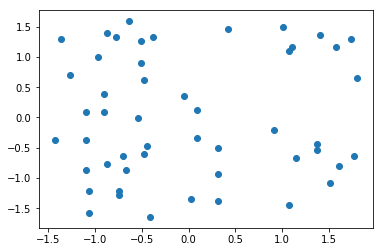

In [44]:
plt.scatter(X2[:,0],X2[:,1])

In [45]:
np.mean(X2[:,0])

4.4408920985006264e-17

In [46]:
np.std(X2[:,0])

1.0

In [47]:
np.mean(X2[:,1])

1.2434497875801754e-16

In [48]:
np.std(X2[:,1])

1.0

## 对测试数据集如何归一化?
* 是根据测试数据集得到的std_train和mean_train同样计算出测试数据的方差和均值吗?

* 测试数据是模拟真实环境:真实环境很有可能无法得到所有测试数据的均值和方差

* 对数据的归一化也是算法的一部分

* (x_test-mean_train)/std_train

* **要保存训练数据集中的均值和方差**


In [50]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [51]:
x[:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [54]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=666)

## scikit-learn中的StandardScaler

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
standarScaler = StandardScaler()

In [57]:
standarScaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
standarScaler.mean_

array([5.83416667, 3.08666667, 3.70833333, 1.17      ])

In [59]:
standarScaler.scale_

array([0.81019502, 0.44327067, 1.76401924, 0.75317107])

In [61]:
x_train = standarScaler.transform(x_train)

In [62]:
x_test = standarScaler.transform(x_test)

In [63]:
std_knn_clf = KNeighborsClassifier(n_neighbors=3)

In [64]:
std_knn_clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [65]:
std_knn_clf.score(x_test,y_test)

1.0